# 2. EDA

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scs
import joblib
import ruamel.yaml as yaml
import matplotlib.pyplot as plt

In [13]:
params_dir = '../config/params.yaml'

In [14]:
def load_params(params_dir):
  with open(params_dir, 'r') as file:
    params = yaml.safe_load(file)

    return params

In [15]:
params = load_params(params_dir)

### 2.0. Load Train Set

In [16]:
x_train = joblib.load(params['train_set_path'][0])
y_train = joblib.load(params['train_set_path'][1])

In [17]:
x_train.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
618349,1,12,2,2,2,2,48,97,2,2,2,2,1,2,2,2,2,2,3,2
766114,2,12,1,1,97,2,41,2,2,2,2,2,2,2,2,2,2,1,7,97
1045426,2,12,1,1,97,2,28,2,2,2,2,2,2,2,2,1,2,2,7,97
415737,2,9,1,1,97,2,32,2,2,2,2,2,2,2,2,2,2,2,7,97
473060,1,12,2,1,97,2,26,97,2,2,2,2,2,2,2,2,2,2,1,97


In [18]:
y_train.head()

618349     9999-99-99
766114     9999-99-99
1045426    9999-99-99
415737     9999-99-99
473060     9999-99-99
Name: DATE_DIED, dtype: object

In [19]:
dataset = pd.concat([x_train, y_train], axis = 1)

In [20]:
dataset

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DATE_DIED
618349,1,12,2,2,2,2,48,97,2,2,...,2,1,2,2,2,2,2,3,2,9999-99-99
766114,2,12,1,1,97,2,41,2,2,2,...,2,2,2,2,2,2,1,7,97,9999-99-99
1045426,2,12,1,1,97,2,28,2,2,2,...,2,2,2,2,1,2,2,7,97,9999-99-99
415737,2,9,1,1,97,2,32,2,2,2,...,2,2,2,2,2,2,2,7,97,9999-99-99
473060,1,12,2,1,97,2,26,97,2,2,...,2,2,2,2,2,2,2,1,97,9999-99-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,2,4,1,1,97,2,43,2,2,2,...,2,2,2,2,2,2,2,7,97,9999-99-99
365838,1,6,2,1,97,2,29,97,2,2,...,2,2,2,2,2,2,2,6,97,9999-99-99
131932,2,4,2,1,97,2,38,97,2,2,...,2,2,2,2,2,2,1,3,97,9999-99-99
671155,2,12,2,1,97,2,46,97,2,2,...,2,2,2,2,2,2,2,5,97,9999-99-99


### 2.1. Check missing value

Sebelumnya, untuk field yes/no(1-2) missing value diubah menjadi 97..99 dari datanya. kita akan mengembalikannya dulu ke null

In [27]:
# handle USMER
dataset.USMER.replace([97, 98, 99], np.nan, inplace = True)
print('USMER', dataset.USMER.unique())

# handle SEX
dataset.SEX.replace([97, 98, 99], np.nan, inplace = True)
print('SEX', dataset.SEX.unique())

# handle PATIENT_TYPE
dataset.PATIENT_TYPE.replace([97, 98, 99], np.nan, inplace = True)
print('PATIENT_TYPE', dataset.PATIENT_TYPE.unique())

# handle INTUBED
dataset.INTUBED.replace([97, 98, 99], np.nan, inplace = True)
print('INTUBED', dataset.INTUBED.unique())

# handle PNEUMONIA
dataset.PNEUMONIA.replace([97, 98, 99], np.nan, inplace = True)
print('PNEUMONIA', dataset.PNEUMONIA.unique())

# handle PREGNANT
dataset.PREGNANT.replace([97, 98, 99], np.nan, inplace = True)
print('PREGNANT', dataset.PREGNANT.unique())

# handle DIABETES
dataset.DIABETES.replace([97, 98, 99], np.nan, inplace = True)
print('DIABETES', dataset.DIABETES.unique())

# handle COPD
dataset.COPD.replace([97, 98, 99], np.nan, inplace = True)
print('COPD', dataset.COPD.unique())

# handle ASTHMA
dataset.ASTHMA.replace([97, 98, 99], np.nan, inplace = True)
print('ASTHMA', dataset.ASTHMA.unique())

# handle INMSUPR
dataset.INMSUPR.replace([97, 98, 99], np.nan, inplace = True)
print('INMSUPR', dataset.INMSUPR.unique())

# handle HIPERTENSION
dataset.HIPERTENSION.replace([97, 98, 99], np.nan, inplace = True)
print('HIPERTENSION', dataset.HIPERTENSION.unique())

# handle OTHER_DISEASE
dataset.OTHER_DISEASE.replace([97, 98, 99], np.nan, inplace = True)
print('OTHER_DISEASE', dataset.OTHER_DISEASE.unique())

# handle CARDIOVASCULAR
dataset.CARDIOVASCULAR.replace([97, 98, 99], np.nan, inplace = True)
print('CARDIOVASCULAR', dataset.CARDIOVASCULAR.unique())

# handle OBESITY
dataset.OBESITY.replace([97, 98, 99], np.nan, inplace = True)
print('OBESITY', dataset.OBESITY.unique())

# handle RENAL_CHRONIC
dataset.RENAL_CHRONIC.replace([97, 98, 99], np.nan, inplace = True)
print('RENAL_CHRONIC', dataset.RENAL_CHRONIC.unique())

# handle TOBACCO
dataset.TOBACCO.replace([97, 98, 99], np.nan, inplace = True)
print('TOBACCO', dataset.TOBACCO.unique())

# handle ICU
dataset.ICU.replace([97, 98, 99], np.nan, inplace = True)
print('ICU', dataset.ICU.unique())



USMER [1 2]
SEX [2 1]
PATIENT_TYPE [2 1]
INTUBED [ 2. nan  1.]
PNEUMONIA [ 2.  1. nan]
PREGNANT [nan  2.  1.]
DIABETES [ 2.  1. nan]
COPD [ 2.  1. nan]
ASTHMA [ 2.  1. nan]
INMSUPR [ 2.  1. nan]
HIPERTENSION [ 1.  2. nan]
OTHER_DISEASE [ 2.  1. nan]
CARDIOVASCULAR [ 2.  1. nan]
OBESITY [ 2.  1. nan]
RENAL_CHRONIC [ 2.  1. nan]
TOBACCO [ 2.  1. nan]
ICU [ 2. nan  1.]


In [28]:
dataset.isnull().sum()

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
INTUBED                 598791
PNEUMONIA                11200
AGE                          0
PREGNANT                369257
DIABETES                  2349
COPD                      2112
ASTHMA                    2102
INMSUPR                   2391
HIPERTENSION              2187
OTHER_DISEASE             3552
CARDIOVASCULAR            2178
OBESITY                   2136
RENAL_CHRONIC             2117
TOBACCO                   2278
CLASIFFICATION_FINAL         0
ICU                     598903
DATE_DIED                    0
dtype: int64

### 2.1 Check Informasi Statistik

### 2.1.1 Check Skewness

In [29]:
dataset.skew(numeric_only = True)

USMER                  -0.549286
MEDICAL_UNIT           -0.515674
SEX                     0.001880
PATIENT_TYPE            1.570500
INTUBED                -1.715009
PNEUMONIA              -2.127754
AGE                     0.282345
PREGNANT               -7.819316
DIABETES               -2.343738
COPD                   -8.147098
ASTHMA                 -5.489848
INMSUPR                -8.391509
HIPERTENSION           -1.900232
OTHER_DISEASE          -5.864694
CARDIOVASCULAR         -6.903267
OBESITY                -1.932315
RENAL_CHRONIC          -7.198974
TOBACCO                -3.090001
CLASIFFICATION_FINAL   -0.424074
ICU                    -2.925316
dtype: float64

imputasi median yang skewnessnya > +- 0.5
- INTUBED, PNEUMONIA, PREGNANT, DIABETES, COPD, ASTHMA, INMSUPR, HIPERTENSION, OTHER_DISEASE, CARDIOVASCULAR, OBESITY, RENAL_CHRONIC, TOBACCO, ICU

### 2.1.2. Pemisahan Dataset berdasarkan kelas (mati atau selamat)

In [30]:
dataset['DEATH'] = np.where(dataset.DATE_DIED == '9999-99-99', 2, 1)
dataset['DEATH'] = dataset['DEATH'].astype(int)

In [34]:
missing_features = ['INTUBED', 'PNEUMONIA', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'ICU']

In [35]:
dataset_survived = dataset[dataset.DEATH == 2][missing_features].copy()
dataset_death = dataset[dataset.DEATH == 1][missing_features].copy()

In [36]:
dataset_survived.describe()

,INTUBED,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,ICU
count,87335.000000,669159.000000,345584.000000,678016.000000,678234.000000,678236.000000,677988.000000,678153.000000,677037.000000,678190.000000,678215.000000,678227.000000,678075.000000,87232.000000
mean,1.941833,1.910045,1.983726,1.900370,1.988678,1.968959,1.988048,1.865401,1.975848,1.983338,1.853271,1.986272,1.920310,1.930496
std,0.234060,0.286117,0.126527,0.299507,0.105801,0.173428,0.108668,0.341295,0.153522,0.128002,0.353836,0.116361,0.270813,0.254311
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [37]:
dataset_death.describe()

,INTUBED,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,ICU
count,47876.000000,53643.000000,19161.000000,53637.000000,53656.000000,53664.000000,53623.000000,53662.000000,53413.000000,53634.000000,53651.000000,53658.000000,53649.000000,47867.000000
mean,1.613209,1.293943,1.996660,1.627179,1.946455,1.980359,1.965239,1.578957,1.940164,1.941213,1.773406,1.924652,1.912654,1.880419
std,0.487020,0.455571,0.057699,0.483560,0.225119,0.138764,0.183176,0.493731,0.237184,0.235228,0.418632,0.263954,0.282343,0.324475
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


[!!] karena mean dari kelas survived dan death tidak berbeda jauh, missing value tidak akan di imputasi dengan kelas

### 2.1.3. Visualisasi untuk fitur INTUBED

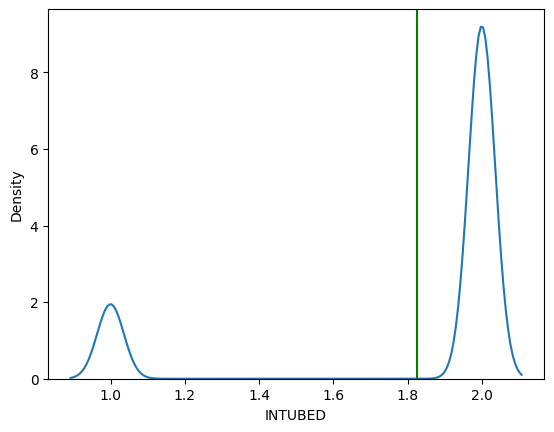

In [43]:
# plot untuk melihat distribusi INTUBED jika tidak dibedakan berdasarkan categori
sns.kdeplot(data = dataset, x = "INTUBED")
plt.axvline(dataset.INTUBED.mean(), 0, 1, color = "g")

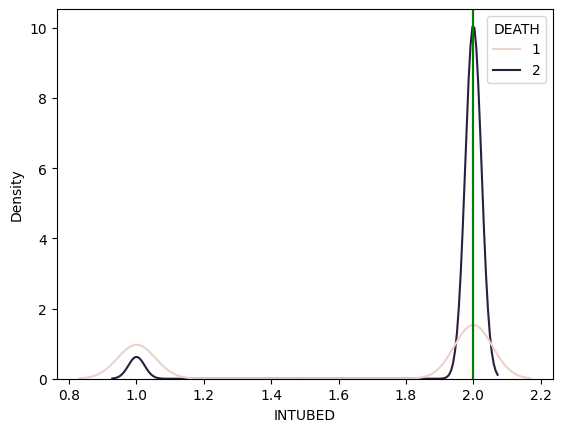

In [44]:
sns.kdeplot(data = dataset, x = "INTUBED", hue = "DEATH")
plt.axvline(dataset_survived.INTUBED.median(), 0, 1, color = "k")
plt.axvline(dataset_death.INTUBED.median(), 0, 1, color = "g")

Distribusi normal, imputasi median kedua kelas tidak berbeda jauh maka tidak akan mengunakan kelas

### 2.1.4. Visualisasi untuk fitur PNEUMONIA

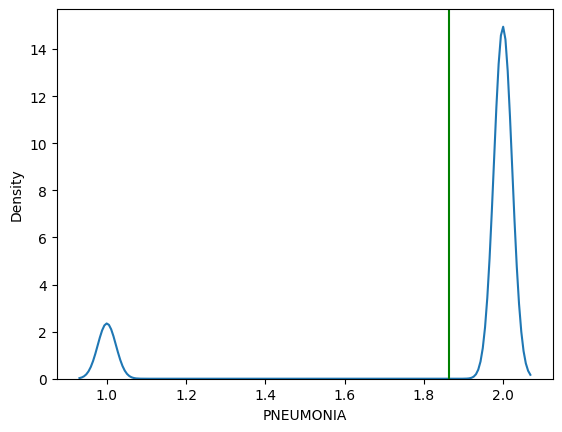

In [45]:
# plot untuk melihat distribusi INTUBED jika tidak dibedakan berdasarkan categori
sns.kdeplot(data = dataset, x = "PNEUMONIA")
plt.axvline(dataset.PNEUMONIA.mean(), 0, 1, color = "g")

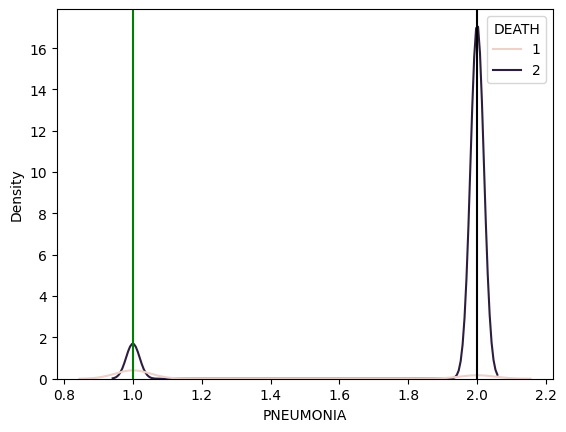

In [46]:
sns.kdeplot(data = dataset, x = "PNEUMONIA", hue = "DEATH")
plt.axvline(dataset_survived.PNEUMONIA.median(), 0, 1, color = "k")
plt.axvline(dataset_death.PNEUMONIA.median(), 0, 1, color = "g")

Distribusi normal, imputasi median kedua kelas tidak berbeda jauh maka tidak akan mengunakan kelas

### 2.1.5. Visualisasi untuk fitur PREGNANT

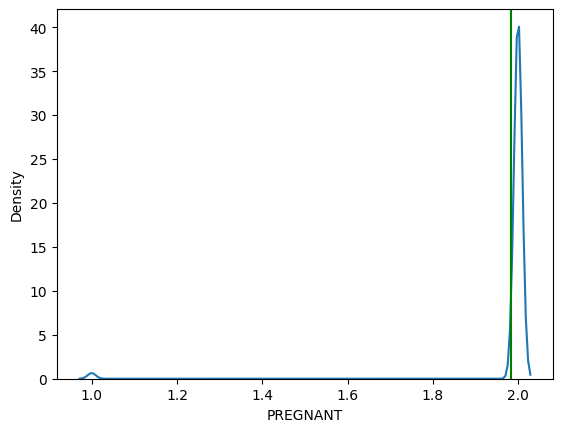

In [48]:
# plot untuk melihat distribusi PREGNANT jika tidak dibedakan berdasarkan categori
sns.kdeplot(data = dataset, x = "PREGNANT")
plt.axvline(dataset.PREGNANT.mean(), 0, 1, color = "g")

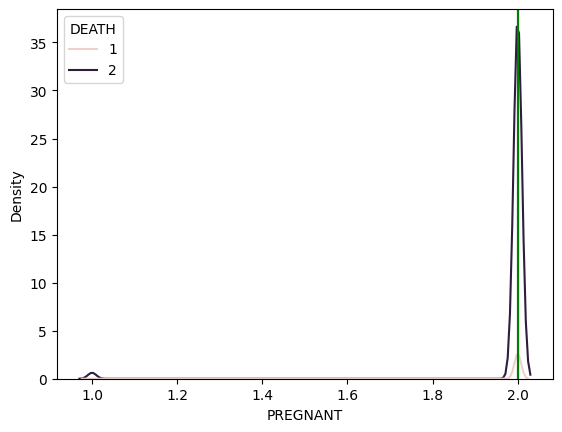

In [60]:
sns.kdeplot(data = dataset, x = "PREGNANT", hue = "DEATH")
plt.axvline(dataset_survived.PREGNANT.median(), 0, 1, color = "k")
plt.axvline(dataset_death.PREGNANT.median(), 0, 1, color = "g")

### 2.1.6. Visualisasi untuk fitur DIABETES

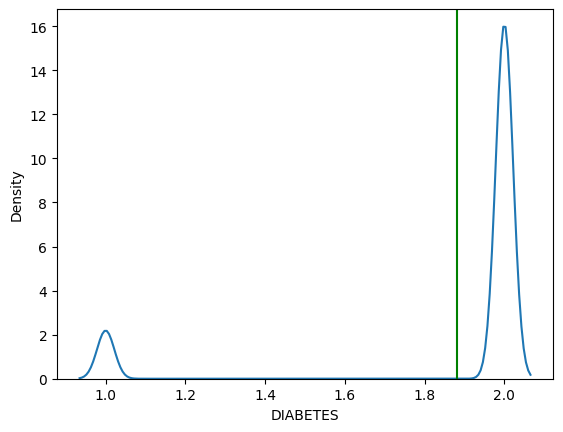

In [49]:
# plot untuk melihat distribusi DIABETES jika tidak dibedakan berdasarkan categori
sns.kdeplot(data = dataset, x = "DIABETES")
plt.axvline(dataset.DIABETES.mean(), 0, 1, color = "g")

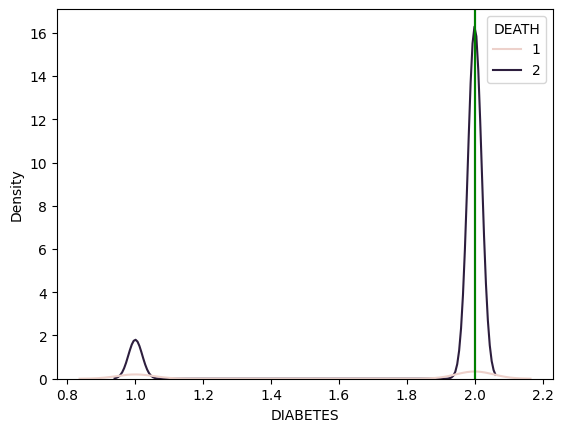

In [61]:
sns.kdeplot(data = dataset, x = "DIABETES", hue = "DEATH")
plt.axvline(dataset_survived.DIABETES.median(), 0, 1, color = "k")
plt.axvline(dataset_death.DIABETES.median(), 0, 1, color = "g")

### 2.1.6. Visualisasi untuk fitur COPD

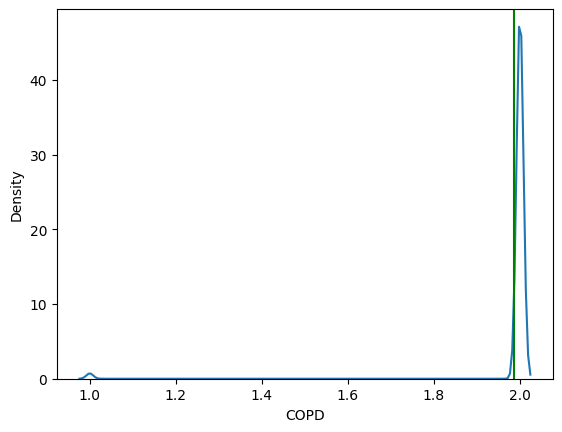

In [50]:
# plot untuk melihat distribusi COPD jika tidak dibedakan berdasarkan categori
sns.kdeplot(data = dataset, x = "COPD")
plt.axvline(dataset.COPD.mean(), 0, 1, color = "g")

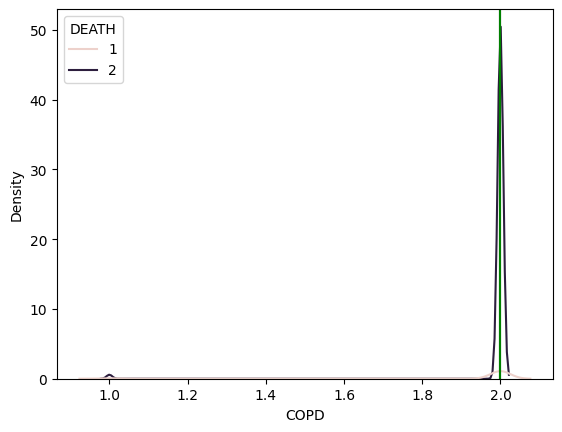

In [62]:
sns.kdeplot(data = dataset, x = "COPD", hue = "DEATH")
plt.axvline(dataset_survived.COPD.median(), 0, 1, color = "k")
plt.axvline(dataset_death.COPD.median(), 0, 1, color = "g")

### 2.1.6. Visualisasi untuk fitur ASTHMA

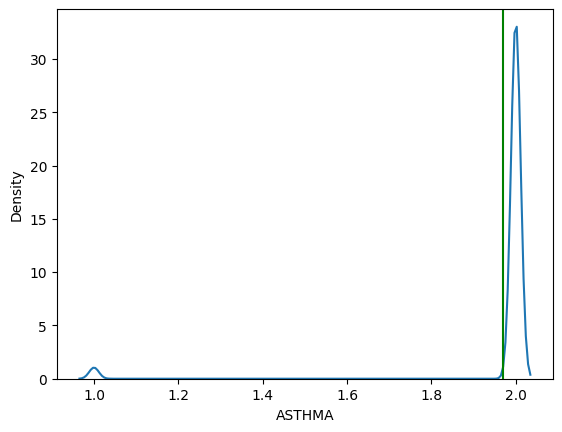

In [51]:
# plot untuk melihat distribusi ASTHMA jika tidak dibedakan berdasarkan categori
sns.kdeplot(data = dataset, x = "ASTHMA")
plt.axvline(dataset.ASTHMA.mean(), 0, 1, color = "g")

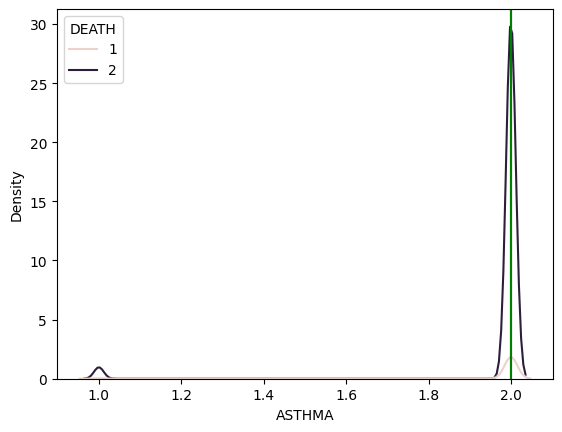

In [63]:
sns.kdeplot(data = dataset, x = "ASTHMA", hue = "DEATH")
plt.axvline(dataset_survived.ASTHMA.median(), 0, 1, color = "k")
plt.axvline(dataset_death.ASTHMA.median(), 0, 1, color = "g")

### 2.1.7. Visualisasi untuk fitur INMSUPR

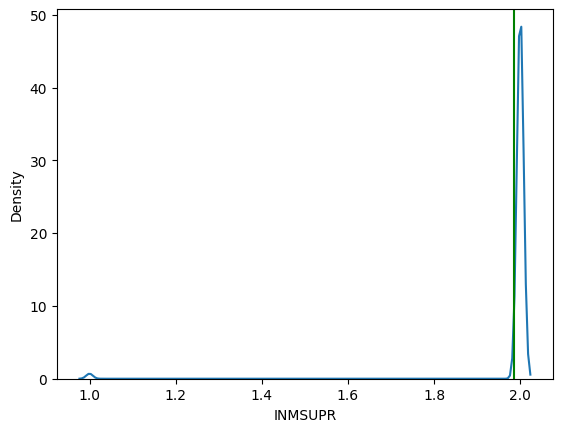

In [52]:
# plot untuk melihat distribusi INMSUPR jika tidak dibedakan berdasarkan categori
sns.kdeplot(data = dataset, x = "INMSUPR")
plt.axvline(dataset.INMSUPR.mean(), 0, 1, color = "g")

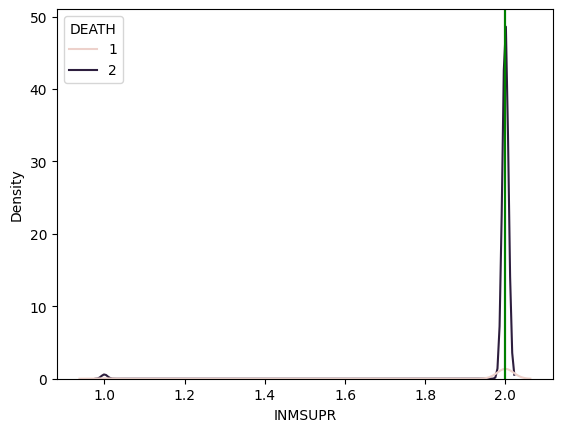

In [74]:
sns.kdeplot(data = dataset, x = "INMSUPR", hue = "DEATH")
plt.axvline(dataset_survived.INMSUPR.median(), 0, 1, color = "k")
plt.axvline(dataset_death.INMSUPR.median(), 0, 1, color = "g")

### 2.1.8. Visualisasi untuk fitur HIPERTENSION

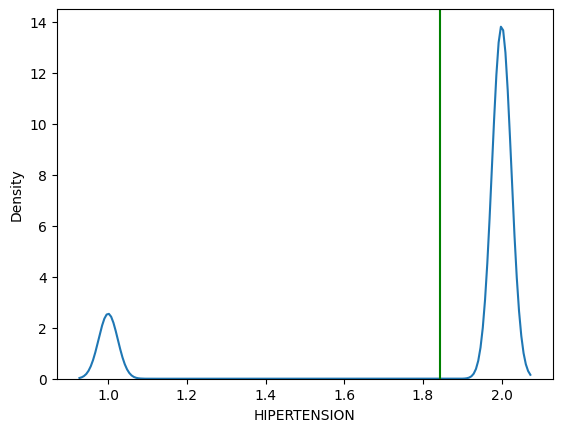

In [53]:
# plot untuk melihat distribusi HIPERTENSION jika tidak dibedakan berdasarkan categori
sns.kdeplot(data = dataset, x = "HIPERTENSION")
plt.axvline(dataset.HIPERTENSION.mean(), 0, 1, color = "g")

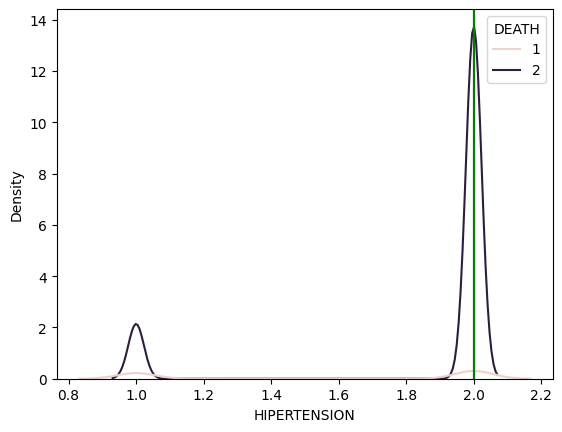

In [73]:
sns.kdeplot(data = dataset, x = "HIPERTENSION", hue = "DEATH")
plt.axvline(dataset_survived.HIPERTENSION.median(), 0, 1, color = "k")
plt.axvline(dataset_death.HIPERTENSION.median(), 0, 1, color = "g")

### 2.1.9. Visualisasi untuk fitur OTHER_DISEASE

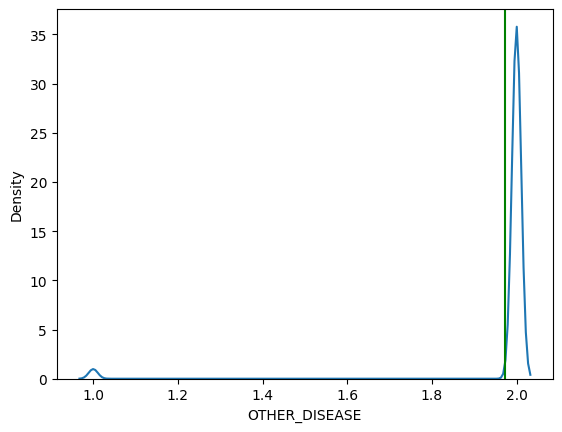

In [54]:
# plot untuk melihat distribusi OTHER_DISEASE jika tidak dibedakan berdasarkan categori
sns.kdeplot(data = dataset, x = "OTHER_DISEASE")
plt.axvline(dataset.OTHER_DISEASE.mean(), 0, 1, color = "g")

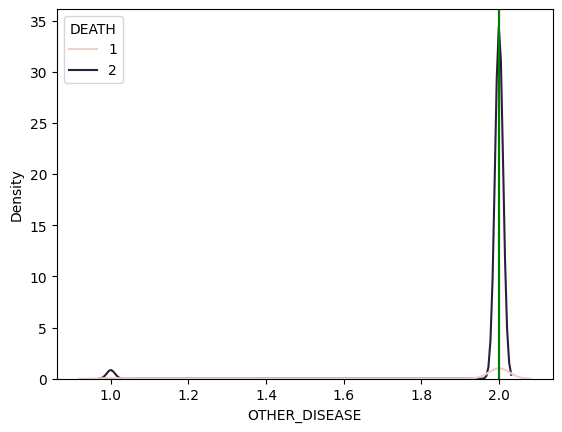

In [72]:
sns.kdeplot(data = dataset, x = "OTHER_DISEASE", hue = "DEATH")
plt.axvline(dataset_survived.OTHER_DISEASE.median(), 0, 1, color = "k")
plt.axvline(dataset_death.OTHER_DISEASE.median(), 0, 1, color = "g")

### 2.1.10. Visualisasi untuk fitur CARDIOVASCULAR

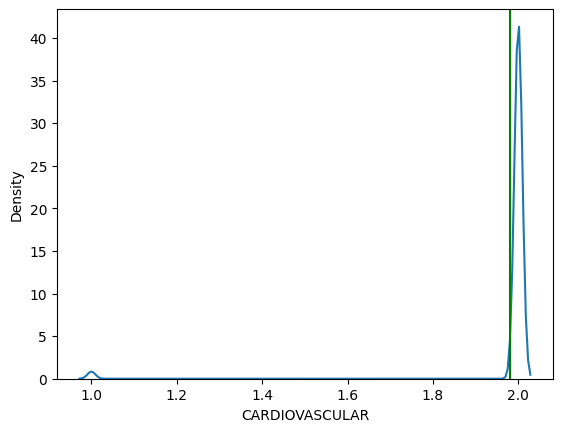

In [55]:
# plot untuk melihat distribusi CARDIOVASCULAR jika tidak dibedakan berdasarkan categori
sns.kdeplot(data = dataset, x = "CARDIOVASCULAR")
plt.axvline(dataset.CARDIOVASCULAR.mean(), 0, 1, color = "g")

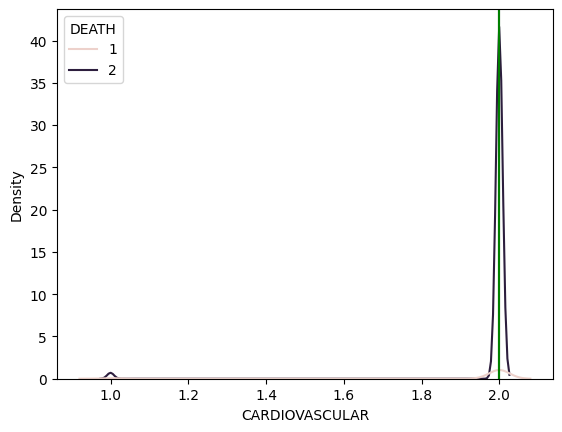

In [71]:
sns.kdeplot(data = dataset, x = "CARDIOVASCULAR", hue = "DEATH")
plt.axvline(dataset_survived.CARDIOVASCULAR.median(), 0, 1, color = "k")
plt.axvline(dataset_death.CARDIOVASCULAR.median(), 0, 1, color = "g")

### 2.1.11. Visualisasi untuk fitur OBESITY

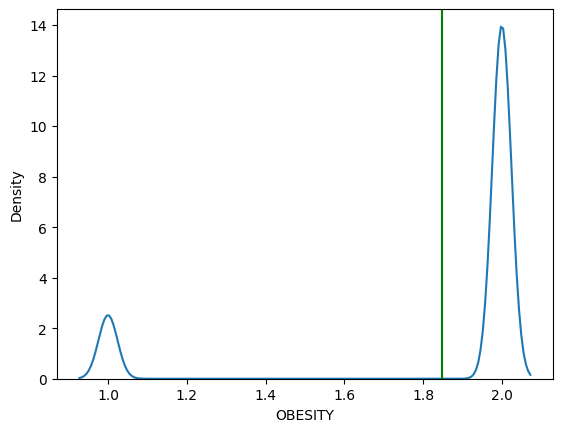

In [56]:
# plot untuk melihat distribusi OBESITY jika tidak dibedakan berdasarkan categori
sns.kdeplot(data = dataset, x = "OBESITY")
plt.axvline(dataset.OBESITY.mean(), 0, 1, color = "g")

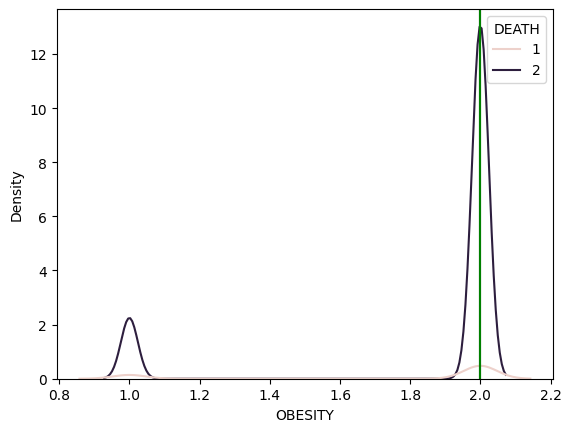

In [70]:
sns.kdeplot(data = dataset, x = "OBESITY", hue = "DEATH")
plt.axvline(dataset_survived.OBESITY.median(), 0, 1, color = "k")
plt.axvline(dataset_death.OBESITY.median(), 0, 1, color = "g")

### 2.1.12. Visualisasi untuk fitur RENAL_CHRONIC

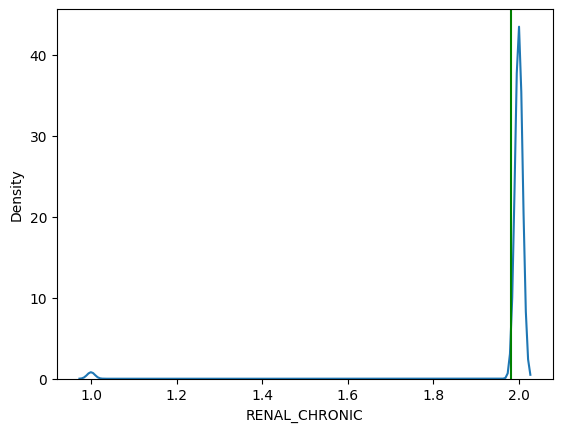

In [57]:
# plot untuk melihat distribusi RENAL_CHRONIC jika tidak dibedakan berdasarkan categori
sns.kdeplot(data = dataset, x = "RENAL_CHRONIC")
plt.axvline(dataset.RENAL_CHRONIC.mean(), 0, 1, color = "g")

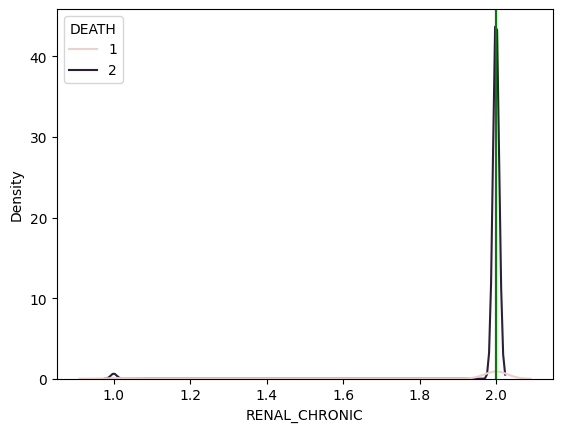

In [69]:
sns.kdeplot(data = dataset, x = "RENAL_CHRONIC", hue = "DEATH")
plt.axvline(dataset_survived.RENAL_CHRONIC.median(), 0, 1, color = "k")
plt.axvline(dataset_death.RENAL_CHRONIC.median(), 0, 1, color = "g")

### 2.1.13. Visualisasi untuk fitur TOBACCO

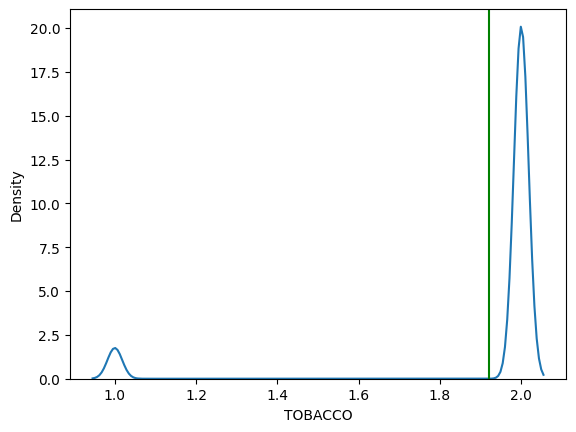

In [58]:
# plot untuk melihat distribusi TOBACCO jika tidak dibedakan berdasarkan categori
sns.kdeplot(data = dataset, x = "TOBACCO")
plt.axvline(dataset.TOBACCO.mean(), 0, 1, color = "g")

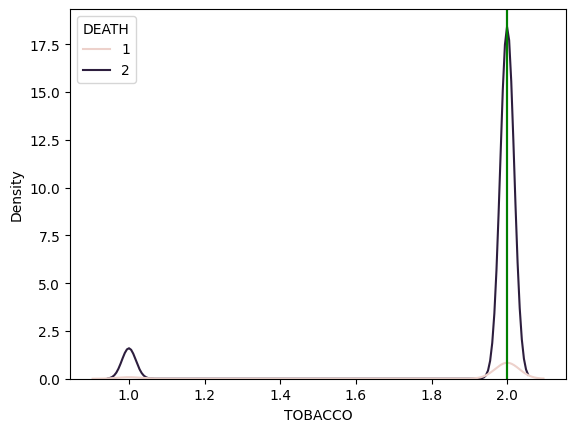

In [75]:
sns.kdeplot(data = dataset, x = "TOBACCO", hue = "DEATH")
plt.axvline(dataset_survived.TOBACCO.median(), 0, 1, color = "k")
plt.axvline(dataset_death.TOBACCO.median(), 0, 1, color = "g")

### 2.1.14. Visualisasi untuk fitur ICU

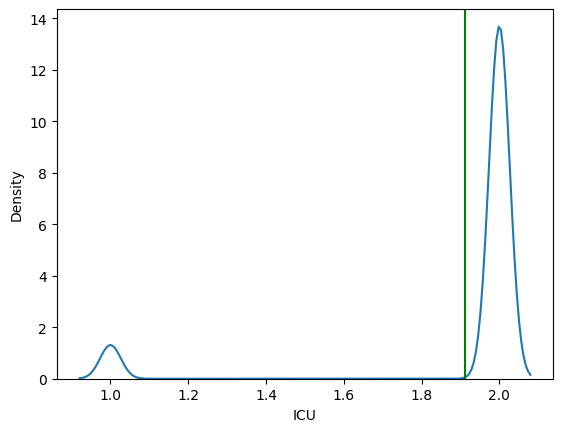

In [59]:
# plot untuk melihat distribusi ICU jika tidak dibedakan berdasarkan categori
sns.kdeplot(data = dataset, x = "ICU")
plt.axvline(dataset.ICU.mean(), 0, 1, color = "g")

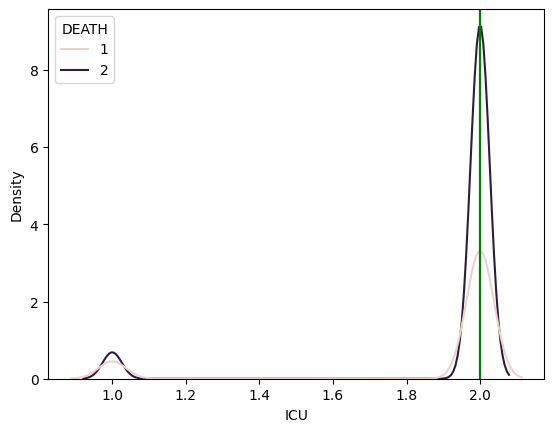

In [76]:
sns.kdeplot(data = dataset, x = "ICU", hue = "DEATH")
plt.axvline(dataset_survived.ICU.median(), 0, 1, color = "k")
plt.axvline(dataset_death.ICU.median(), 0, 1, color = "g")

### 2.1.15. Pearson Correlation

<AxesSubplot: >

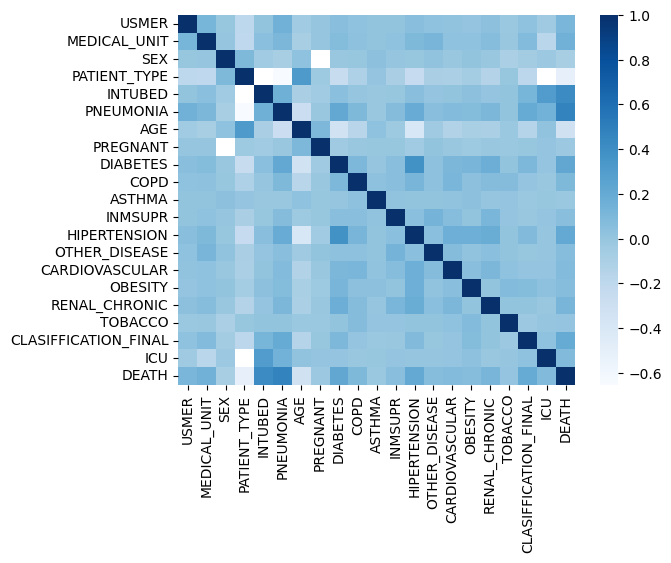

In [81]:
sns.heatmap(dataset.corr(numeric_only = True), cmap='Blues')

### 2.1.16. T-Test untuk INTUBED

In [92]:
# h0    = mean INTUBED untuk kelas 0 = mean INTUBED untuk kelas 1
# h1    = mean INTUBED untuk kelas 0 != mean INTUBED untuk kelas 1

print(scs.ttest_ind(
    dataset_survived[dataset_survived.INTUBED.isnull() != True].INTUBED,
    dataset_death[dataset_death.INTUBED.isnull() != True].INTUBED
))


# nilai t critical untuk alpha 0.05
print(scs.t.ppf(0.05, df = (len(dataset) - 2)))

Ttest_indResult(statistic=167.2624845655174, pvalue=0.0)
-1.644855702933874


In [91]:
# p-value < 0.05 maka h0 di terima

### 2.1.17. T-Test untuk PNEUMONIA

In [87]:
# h0    = mean PNEUMONIA untuk kelas 0 = mean PNEUMONIA untuk kelas 1
# h1    = mean PNEUMONIA untuk kelas 0 != mean PNEUMONIA untuk kelas 1

print(scs.ttest_ind(
    dataset_survived[dataset_survived.PNEUMONIA.isnull() != True].PNEUMONIA,
    dataset_death[dataset_death.PNEUMONIA.isnull() != True].PNEUMONIA
))


# nilai t critical untuk alpha 0.05
print(scs.t.ppf(0.05, df = (len(dataset) - 2)))

Ttest_indResult(statistic=454.663144861961, pvalue=0.0)
-1.644855702933874


In [90]:
# p-value < 0.05 maka h0 di terima

### 2.1.18. T-Test untuk PREGNANT

In [88]:
# h0    = mean PREGNANT untuk kelas 0 = mean PREGNANT untuk kelas 1
# h1    = mean PREGNANT untuk kelas 0 != mean PREGNANT untuk kelas 1

print(scs.ttest_ind(
    dataset_survived[dataset_survived.PREGNANT.isnull() != True].PREGNANT,
    dataset_death[dataset_death.PREGNANT.isnull() != True].PREGNANT
))


# nilai t critical untuk alpha 0.05
print(scs.t.ppf(0.05, df = (len(dataset) - 2)))

Ttest_indResult(statistic=-14.068937081736456, pvalue=6.056896496700646e-45)
-1.644855702933874


In [89]:
# nilai p-value < 0.05 maka h0 di terima

### 2.1.19. T-Test untuk DIABETES

In [93]:
# h0    = mean DIABETES untuk kelas 0 = mean DIABETES untuk kelas 1
# h1    = mean DIABETES untuk kelas 0 != mean DIABETES untuk kelas 1

print(scs.ttest_ind(
    dataset_survived[dataset_survived.DIABETES.isnull() != True].DIABETES,
    dataset_death[dataset_death.DIABETES.isnull() != True].DIABETES
))


# nilai t critical untuk alpha 0.05
print(scs.t.ppf(0.05, df = (len(dataset) - 2)))

Ttest_indResult(statistic=192.34465670234383, pvalue=0.0)
-1.644855702933874


In [94]:
# nilai p-value < 0.05 maka h0 di terima

### 2.1.20. T-Test untuk COPD

In [95]:
# h0    = mean COPD untuk kelas 0 = mean COPD untuk kelas 1
# h1    = mean COPD untuk kelas 0 != mean COPD untuk kelas 1

print(scs.ttest_ind(
    dataset_survived[dataset_survived.COPD.isnull() != True].COPD,
    dataset_death[dataset_death.COPD.isnull() != True].COPD
))


# nilai t critical untuk alpha 0.05
print(scs.t.ppf(0.05, df = (len(dataset) - 2)))

Ttest_indResult(statistic=79.32129055190077, pvalue=0.0)
-1.644855702933874


In [96]:
# nilai p-value < 0.05 maka h0 di terima

### 2.1.20. T-Test untuk ASTHMA

In [97]:
# h0    = mean ASTHMA untuk kelas 0 = mean ASTHMA untuk kelas 1
# h1    = mean ASTHMA untuk kelas 0 != mean ASTHMA untuk kelas 1

print(scs.ttest_ind(
    dataset_survived[dataset_survived.ASTHMA.isnull() != True].ASTHMA,
    dataset_death[dataset_death.ASTHMA.isnull() != True].ASTHMA
))


# nilai t critical untuk alpha 0.05
print(scs.t.ppf(0.05, df = (len(dataset) - 2)))

Ttest_indResult(statistic=-14.855942628100873, pvalue=6.474371053998129e-50)
-1.644855702933874


In [98]:
# nilai p-value < 0.05 maka h0 di terima

### 2.1.20. T-Test untuk INMSUPR

In [99]:
# h0    = mean INMSUPR untuk kelas 0 = mean INMSUPR untuk kelas 1
# h1    = mean INMSUPR untuk kelas 0 != mean INMSUPR untuk kelas 1

print(scs.ttest_ind(
    dataset_survived[dataset_survived.INMSUPR.isnull() != True].INMSUPR,
    dataset_death[dataset_death.INMSUPR.isnull() != True].INMSUPR
))


# nilai t critical untuk alpha 0.05
print(scs.t.ppf(0.05, df = (len(dataset) - 2)))

Ttest_indResult(statistic=43.9210834629732, pvalue=0.0)
-1.644855702933874


In [100]:
# nilai p-value < 0.05 maka h0 di terima

### 2.1.20. T-Test untuk HIPERTENSION

In [101]:
# h0    = mean HIPERTENSION untuk kelas 0 = mean HIPERTENSION untuk kelas 1
# h1    = mean HIPERTENSION untuk kelas 0 != mean HIPERTENSION untuk kelas 1

print(scs.ttest_ind(
    dataset_survived[dataset_survived.HIPERTENSION.isnull() != True].HIPERTENSION,
    dataset_death[dataset_death.HIPERTENSION.isnull() != True].HIPERTENSION
))


# nilai t critical untuk alpha 0.05
print(scs.t.ppf(0.05, df = (len(dataset) - 2)))

Ttest_indResult(statistic=180.08076777893157, pvalue=0.0)
-1.644855702933874


In [102]:
# nilai p-value < 0.05 maka h0 di terima

### 2.1.20. T-Test untuk OTHER_DISEASE

In [104]:
# nilai p-value < 0.05 maka h0 di terima

In [103]:
# h0    = mean OTHER_DISEASE untuk kelas 0 = mean OTHER_DISEASE untuk kelas 1
# h1    = mean OTHER_DISEASE untuk kelas 0 != mean OTHER_DISEASE untuk kelas 1

print(scs.ttest_ind(
    dataset_survived[dataset_survived.OTHER_DISEASE.isnull() != True].OTHER_DISEASE,
    dataset_death[dataset_death.OTHER_DISEASE.isnull() != True].OTHER_DISEASE
))


# nilai t critical untuk alpha 0.05
print(scs.t.ppf(0.05, df = (len(dataset) - 2)))

Ttest_indResult(statistic=49.27813666988566, pvalue=0.0)
-1.644855702933874


### 2.1.20. T-Test untuk CARDIOVASCULAR

In [109]:
# h0    = mean CARDIOVASCULAR untuk kelas 0 = mean CARDIOVASCULAR untuk kelas 1
# h1    = mean CARDIOVASCULAR untuk kelas 0 != mean CARDIOVASCULAR untuk kelas 1

print(scs.ttest_ind(
    dataset_survived[dataset_survived.CARDIOVASCULAR.isnull() != True].CARDIOVASCULAR,
    dataset_death[dataset_death.CARDIOVASCULAR.isnull() != True].CARDIOVASCULAR
))


# nilai t critical untuk alpha 0.05
print(scs.t.ppf(0.05, df = (len(dataset) - 2)))

Ttest_indResult(statistic=67.7091088359693, pvalue=0.0)
-1.644855702933874


In [110]:
# nilai p-value < 0.05 maka h0 di terima

### 2.1.20. T-Test untuk OBESITY

In [107]:
# h0    = mean OBESITY untuk kelas 0 = mean OBESITY untuk kelas 1
# h1    = mean OBESITY untuk kelas 0 != mean OBESITY untuk kelas 1

print(scs.ttest_ind(
    dataset_survived[dataset_survived.OBESITY.isnull() != True].OBESITY,
    dataset_death[dataset_death.OBESITY.isnull() != True].OBESITY
))


# nilai t critical untuk alpha 0.05
print(scs.t.ppf(0.05, df = (len(dataset) - 2)))

Ttest_indResult(statistic=49.60641819631695, pvalue=0.0)
-1.644855702933874


In [108]:
# nilai p-value < 0.05 maka h0 di terima

### 2.1.20. T-Test untuk RENAL_CHRONIC

In [111]:
# h0    = mean RENAL_CHRONIC untuk kelas 0 = mean RENAL_CHRONIC untuk kelas 1
# h1    = mean RENAL_CHRONIC untuk kelas 0 != mean RENAL_CHRONIC untuk kelas 1

print(scs.ttest_ind(
    dataset_survived[dataset_survived.RENAL_CHRONIC.isnull() != True].RENAL_CHRONIC,
    dataset_death[dataset_death.RENAL_CHRONIC.isnull() != True].RENAL_CHRONIC
))


# nilai t critical untuk alpha 0.05
print(scs.t.ppf(0.05, df = (len(dataset) - 2)))

Ttest_indResult(statistic=103.40999932215409, pvalue=0.0)
-1.644855702933874


In [112]:
# nilai p-value < 0.05 maka h0 di terima

### 2.1.20. T-Test untuk TOBACCO

In [113]:
# h0    = mean TOBACCO untuk kelas 0 = mean TOBACCO untuk kelas 1
# h1    = mean TOBACCO untuk kelas 0 != mean TOBACCO untuk kelas 1

print(scs.ttest_ind(
    dataset_survived[dataset_survived.TOBACCO.isnull() != True].TOBACCO,
    dataset_death[dataset_death.TOBACCO.isnull() != True].TOBACCO
))


# nilai t critical untuk alpha 0.05
print(scs.t.ppf(0.05, df = (len(dataset) - 2)))

Ttest_indResult(statistic=6.282807522267712, pvalue=3.3269858498685683e-10)
-1.644855702933874


In [114]:
# nilai p-value < 0.05 maka h0 di terima

### 2.1.20. T-Test untuk ICU

In [115]:
# h0    = mean ICU untuk kelas 0 = mean ICU untuk kelas 1
# h1    = mean ICU untuk kelas 0 != mean ICU untuk kelas 1

print(scs.ttest_ind(
    dataset_survived[dataset_survived.ICU.isnull() != True].ICU,
    dataset_death[dataset_death.ICU.isnull() != True].ICU
))


# nilai t critical untuk alpha 0.05
print(scs.t.ppf(0.05, df = (len(dataset) - 2)))

Ttest_indResult(statistic=31.31000487828566, pvalue=2.009139751376362e-214)
-1.644855702933874


In [116]:
# nilai p-value < 0.05 maka h0 di terima

### 2.2. Check Imbalance Label

In [117]:
dataset.DEATH.value_counts()

2    679840
1     54162
Name: DEATH, dtype: int64

<AxesSubplot: xlabel='DEATH', ylabel='Count'>

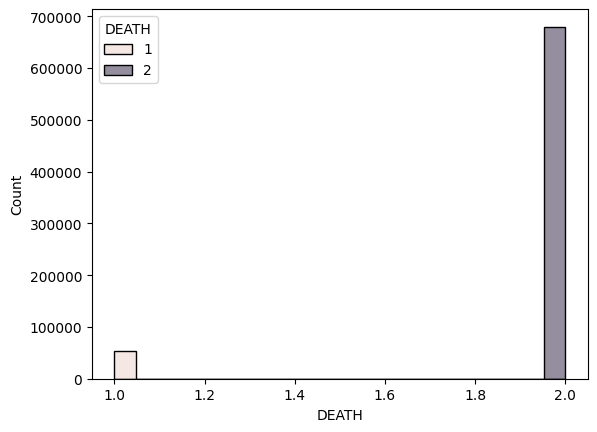

In [118]:
sns.histplot(data = dataset, x = "DEATH", hue = "DEATH")

### 2.3. Check Outliers

Sebenarnya tidak mungkin ada outlier karena feature berada dalam range 1 & 2 saja

<AxesSubplot: xlabel='INTUBED'>

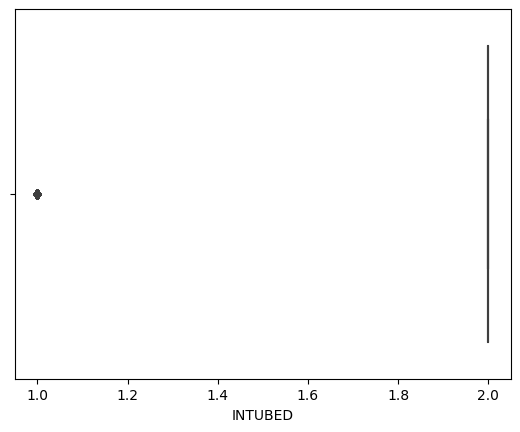

In [120]:
sns.boxplot(data = dataset, x = "INTUBED")

<AxesSubplot: xlabel='PNEUMONIA'>

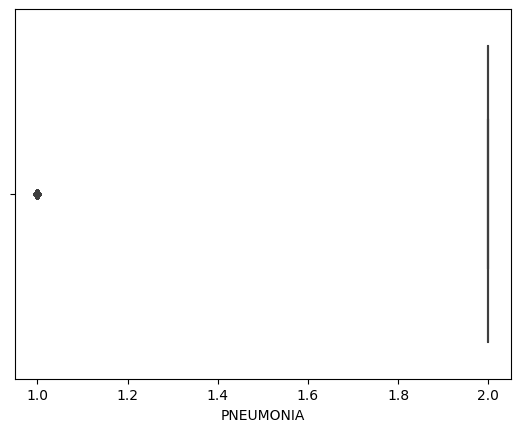

In [121]:
sns.boxplot(data = dataset, x = "PNEUMONIA")

<AxesSubplot: xlabel='PREGNANT'>

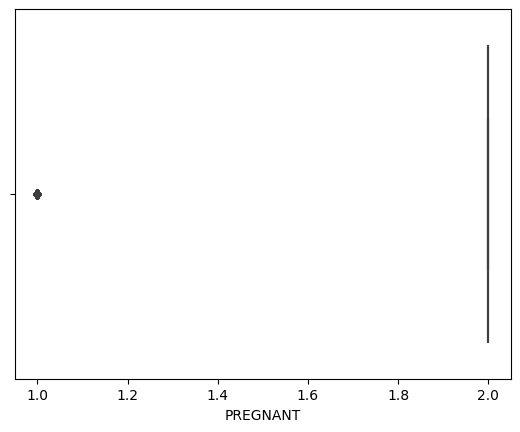

In [122]:
sns.boxplot(data = dataset, x = "PREGNANT")

<AxesSubplot: xlabel='DIABETES'>

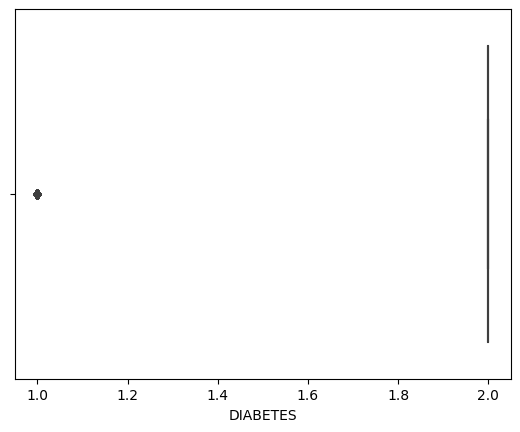

In [123]:
sns.boxplot(data = dataset, x = "DIABETES")

<AxesSubplot: xlabel='COPD'>

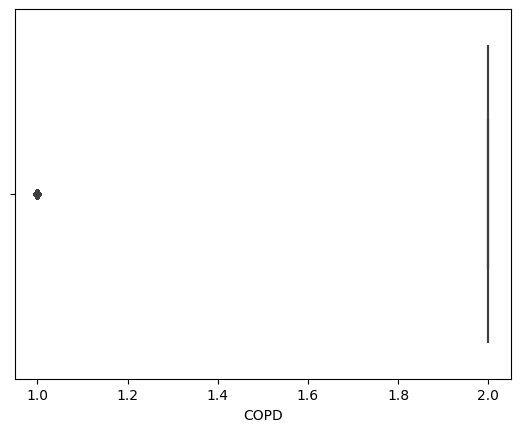

In [124]:
sns.boxplot(data = dataset, x = "COPD")

<AxesSubplot: xlabel='ASTHMA'>

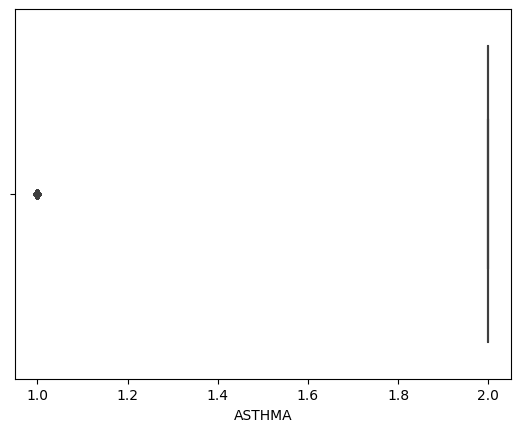

In [125]:
sns.boxplot(data = dataset, x = "ASTHMA")

<AxesSubplot: xlabel='INMSUPR'>

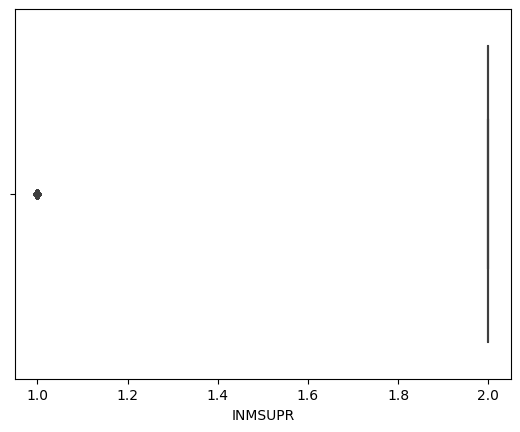

In [126]:
sns.boxplot(data = dataset, x = "INMSUPR")

<AxesSubplot: xlabel='HIPERTENSION'>

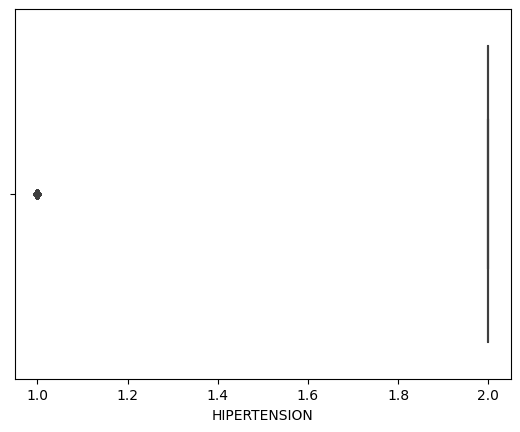

In [127]:
sns.boxplot(data = dataset, x = "HIPERTENSION")

<AxesSubplot: xlabel='OTHER_DISEASE'>

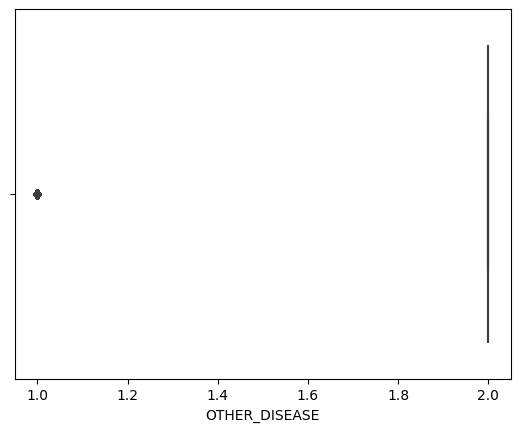

In [128]:
sns.boxplot(data = dataset, x = "OTHER_DISEASE")

<AxesSubplot: xlabel='CARDIOVASCULAR'>

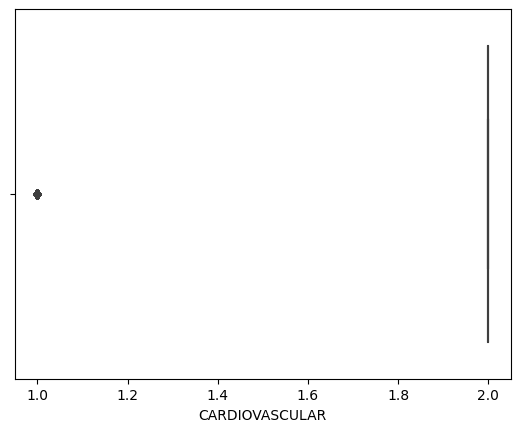

In [129]:
sns.boxplot(data = dataset, x = "CARDIOVASCULAR")

<AxesSubplot: xlabel='OBESITY'>

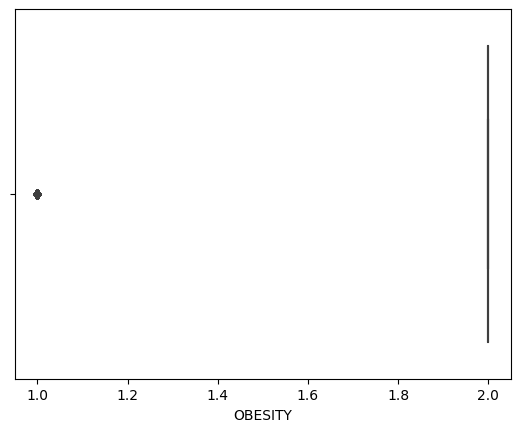

In [130]:
sns.boxplot(data = dataset, x = "OBESITY")

<AxesSubplot: xlabel='RENAL_CHRONIC'>

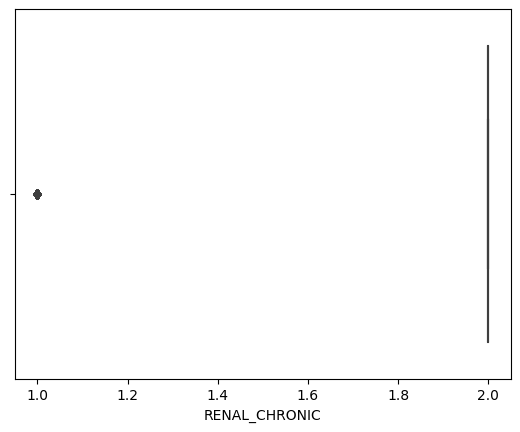

In [131]:
sns.boxplot(data = dataset, x = "RENAL_CHRONIC")

<AxesSubplot: xlabel='TOBACCO'>

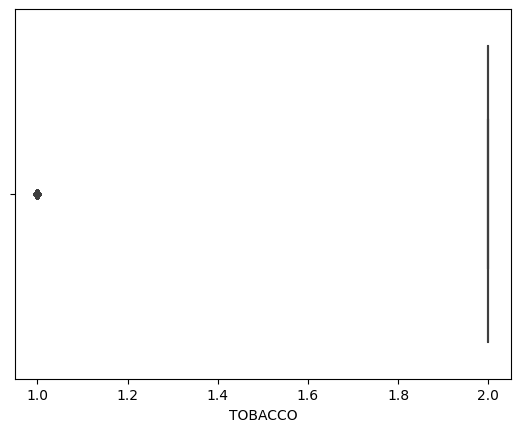

In [132]:
sns.boxplot(data = dataset, x = "TOBACCO")

<AxesSubplot: xlabel='ICU'>

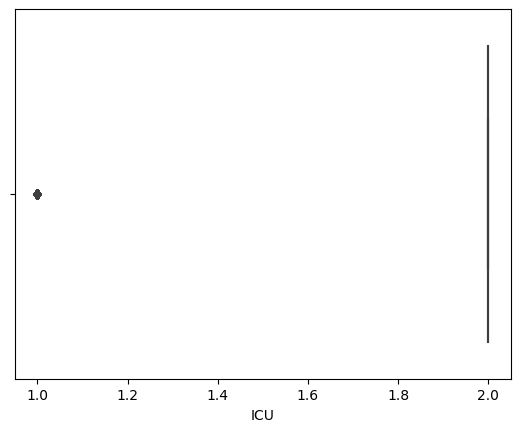

In [133]:
sns.boxplot(data = dataset, x = "ICU")

### Kesimpulan

1. Missing value Handling

- INTUBED: median
- PNEUMONIA: median
- PREGNANT: median
- DIABETES: median
- COPD: median
- ASTHMA: median
- INMSUPR: median
- HIPERTENSION: median
- OTHER_DISEASE: median
- CARDIOVASCULAR: median
- OBESITY: median
- RENAL_CHRONIC: median
- TOBACCO: median
- ICU: median

2. Perlu balancing nilai death 1 dan 0

3. Tidak perlu outlier removal